In [1]:
import mdsine2 as md2
from mdsine2.names import STRNAMES
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
# ACS98: installed scikit-learn into mdsine2 conda env

[DEBUG] Using default logger (stdout, stderr).


# Gibson et al., 2021

In [2]:
output_dir = Path('gibson-results')

## Con el set de datos _`replicates`_

In [3]:
gibson_df = md2.dataset.load_gibson(dset = "replicates", as_df=True)
gibson_df.keys()

[DEBUG] Downloading taxonomy
[DEBUG] Downloading metadata
[DEBUG] Downloading reads
[DEBUG] Downloading qpcr
[DEBUG] Downloading peturbations


dict_keys(['metadata', 'taxonomy', 'reads', 'qpcr', 'perturbations'])

In [4]:
gibson_df['metadata']

,subject,time
sampleID,,
M2-D10-1A,M2-D10,0.0
M2-D10-1B,M2-D10,1.0
M2-D10-2A,M2-D10,2.0
M2-D10-2B,M2-D10,3.0
M2-D10-3A,M2-D10,4.0
M2-D10-3B,M2-D10,5.0
M2-D8-1A,M2-D8,0.0
M2-D8-1B,M2-D8,1.0
M2-D8-2A,M2-D8,2.0


In [5]:
gibson_df['taxonomy']

,sequence,kingdom,phylum,class,order,family,genus,species
name,,,,,,,,
ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,NA
ASV_2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,fragilis/ovatus
ASV_3,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila
ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NA
ASV_5,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila
...,...,...,...,...,...,...,...,...
ASV_1469,TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Parabacteroides,NA
ASV_1470,TACGTAGGGGGCAAGCGTTATCCGGAATCATTGGGCGTAAAGGGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,NA
ASV_1471,TACGTAGGGGGCAAGCGTTATCCGGAATCATTGGGCGTAAAGGGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,NA


In [6]:
gibson_df['reads']

,M2-D10-1A,M2-D10-1B,M2-D10-2A,M2-D10-2B,M2-D10-3A,M2-D10-3B,M2-D8-1A,M2-D8-1B,M2-D8-2A,M2-D8-2B,M2-D8-3A,M2-D8-3B,M2-D9-1A,M2-D9-1B,M2-D9-2A,M2-D9-2B,M2-D9-3A,M2-D9-3B
ASV_1,568,557,549,523,581,629,2997,2676,3591,3325,3286,3866,176,176,213,141,205,135
ASV_2,110,90,96,92,127,115,63,45,64,68,75,82,104,64,124,100,107,98
ASV_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_4,4246,3742,4686,3811,4284,4457,1879,1749,1721,2131,2124,2348,3323,2908,3830,3097,3626,3340
ASV_5,6477,11869,14770,13379,10936,13469,9872,12898,14950,13720,14355,17185,13421,11304,19043,15768,18249,12639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASV_1469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_1470,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_1471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_1472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
gibson_df['qpcr']

,measurement1,measurement2,measurement3
sampleID,,,
M2-D10-1A,4.129004e+10,6.423568e+10,8.384557e+10
M2-D10-1B,4.129004e+10,6.423568e+10,8.384557e+10
M2-D10-2A,4.129004e+10,6.423568e+10,8.384557e+10
M2-D10-2B,4.129004e+10,6.423568e+10,8.384557e+10
M2-D10-3A,4.129004e+10,6.423568e+10,8.384557e+10
M2-D10-3B,4.129004e+10,6.423568e+10,8.384557e+10
M2-D8-1A,1.312028e+11,2.028786e+11,1.114016e+11
M2-D8-1B,1.312028e+11,2.028786e+11,1.114016e+11
M2-D8-2A,1.312028e+11,2.028786e+11,1.114016e+11


In [8]:
gibson_df['perturbations']

In [9]:
gibson_df['metadata'].to_csv('gibson-datasets/metadata_replicates.tsv', sep='\t')
gibson_df['taxonomy'].to_csv('gibson-datasets/taxonomy_replicates.tsv', sep='\t')
gibson_df['reads'].to_csv('gibson-datasets/reads_replicates.tsv', sep='\t')
gibson_df['qpcr'].to_csv('gibson-datasets/qpcr_replicates.tsv', sep='\t')
# gibson_df['perturbations'].to_csv('gibson-datasets/perturbations_replicates.tsv', sep='\t')

In [10]:
gibson_rep = md2.dataset.load_gibson(dset = "replicates")
gibson_rep.name = 'gibson_replicates'

[DEBUG] Downloading taxonomy
[DEBUG] Downloading metadata
[DEBUG] Downloading reads
[DEBUG] Downloading qpcr
[DEBUG] Downloading peturbations
[INFO] TaxaSet parsng new taxonomy table. Resetting
[INFO] No `name` found - assuming index is the name


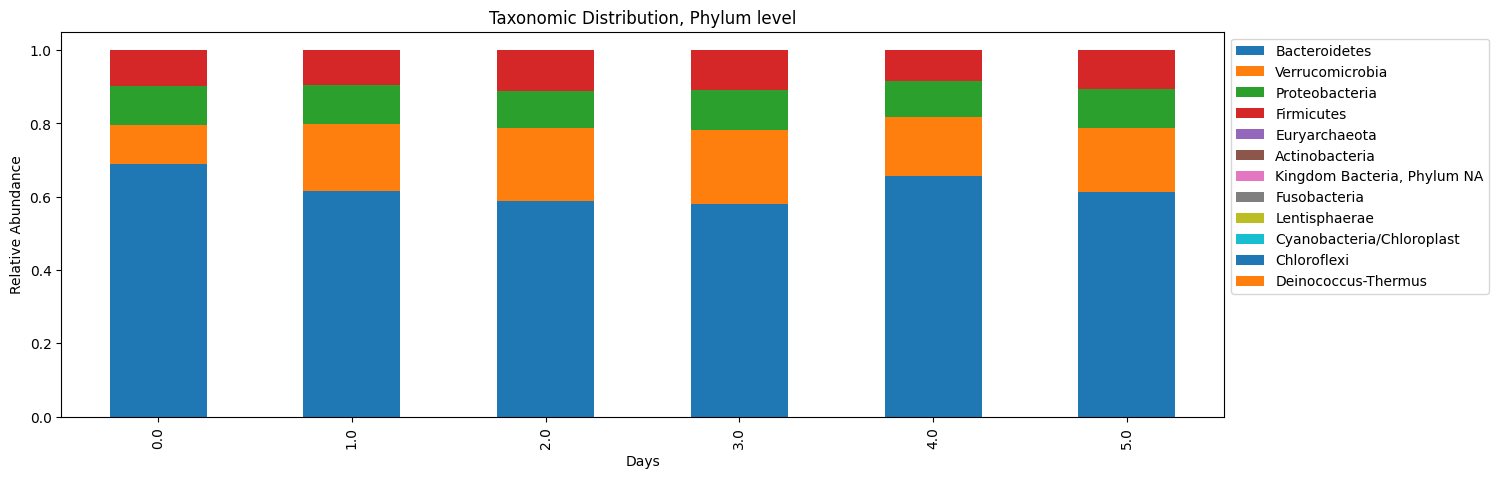

In [13]:
# Plot the taxa abundances at the phylum level for subject `M2-D10`
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
md2.visualization.taxonomic_distribution_over_time(gibson_rep['M2-D10'], taxlevel='phylum', label_formatter='%(phylum)s', ax=ax)
plt.show()

AttributeError: 'Taxon' object has no attribute 'components'

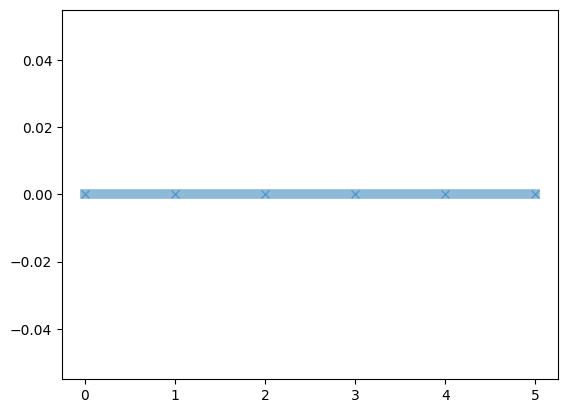

In [14]:
# Visualize the aggregate ASVs collapsed for any OTU in the study
ax = md2.visualization.aggregate_taxa_abundances(subj=gibson_rep['M2-D10'], agg=gibson_rep.taxa['ASV_3'])
plt.show()

In [15]:
params_rep = md2.config.NegBinConfig(
    seed=0, burnin=100, n_samples=200,
    checkpoint=100, 
    basepath=str(output_dir / "negbin-replicates"))

In [16]:
mcmc_negbin_rep = md2.negbin.build_graph(
    params=params_rep, 
    graph_name=gibson_rep.name, 
    subjset=gibson_rep)

[DEBUG] Available subjects: M2-D10,M2-D8,M2-D9
[DEBUG] Subject M2-D10, available qpcr: 0.0,1.0,2.0,3.0,4.0,5.0
[DEBUG] Subject M2-D8, available qpcr: 0.0,1.0,2.0,3.0,4.0,5.0
[DEBUG] Subject M2-D9, available qpcr: 0.0,1.0,2.0,3.0,4.0,5.0
[INFO] Setting Single Write, Multiple Read Mode
[INFO] Setting the trace of learned parameters
[INFO] #######################################
[INFO] Setting the trace of Negative binomial dispersion a0
[INFO] Setting the trace of Negative binomial dispersion a1
[INFO] Setting the trace of Filtering
[INFO] Setting the trace for diagnostic variables
[INFO] ##########################################


In [17]:
mcmc_negbin_rep = md2.negbin.run_graph(
    mcmc_negbin_rep, 
    crash_if_error=True)

 50%|█████     | 100/200 [00:24<00:22,  4.42it/s][DEBUG] Inference iteration 100/200, time: 24.50742530822754
[DEBUG] Negative binomial dispersion a0: Value: 1.609962299223632e-10, Acceptance rate: 1.0
[DEBUG] Negative binomial dispersion a1: Value: 0.08996952278910601, Acceptance rate: 0.56
[DEBUG] Filtering: no-mp : Time: 0.2120, Acc: [0.948, 0.941, 0.952], data/sec: 20846.27
100%|██████████| 200/200 [00:47<00:00,  4.20it/s]
[INFO] Inference total time: 0.23837106347084044/Gibb step
[INFO] remove local traces


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


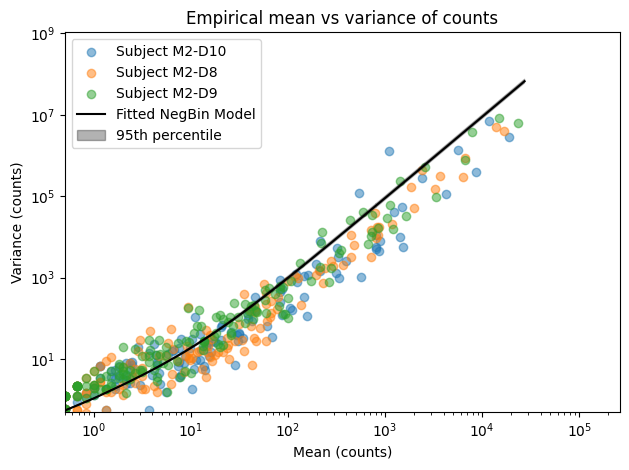

In [18]:
fig = md2.negbin.visualize_learned_negative_binomial_model(mcmc_negbin_rep)
fig.tight_layout()
plt.show()

In [19]:
print('a0', md2.summary(mcmc_negbin_rep.graph[STRNAMES.NEGBIN_A0]))
print('a1', md2.summary(mcmc_negbin_rep.graph[STRNAMES.NEGBIN_A1]))

a0 {'median': 2.269601449227365e-10, 'mean': 2.1745786584891245e-10, '25th percentile': 1.9731446558343605e-10, '75th percentile': 2.4333089559291896e-10}
a1 {'median': 0.08916192877319198, 'mean': 0.08935641804768042, '25th percentile': 0.08513346030155973, '75th percentile': 0.09332735982654498}


In [20]:
# Get a0 and a1 from negbin (get the mean of the posterior) and fixes them for inference
a0_rep = md2.summary(mcmc_negbin_rep.graph[STRNAMES.NEGBIN_A0])['mean']
a1_rep = md2.summary(mcmc_negbin_rep.graph[STRNAMES.NEGBIN_A1])['mean']

print('negbin a0', a0_rep)
print('negbin a1', a1_rep)

negbin a0 2.1745786584891245e-10
negbin a1 0.08935641804768042


In [21]:
basepath_rep = output_dir / "mdsine2" / "replicates"
basepath_rep.mkdir(exist_ok=True, parents=True)

In [22]:
# Initialize parameters of the model (Seed = 0) burnin=50, total steps=100
params_rep = md2.config.MDSINE2ModelConfig(
    basepath=str(basepath_rep), 
    seed=0,
    burnin=50, 
    n_samples=100, 
    negbin_a0=a0_rep, negbin_a1=a1_rep, 
    checkpoint=50
)

In [23]:
# The default number of modules is 30, which is larger than the number of taxa
# that we have in this dataset, which would throw a flag.
params_rep.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'no-clusters'

In [24]:
# initilize the graph
mcmc_rep = md2.initialize_graph(params=params_rep, graph_name=gibson_rep.name, subjset=gibson_rep)

[INFO] max_value found: 143666951174.38287, scaling_factor: 6.960543060360489e-10
[INFO] Normalizing abundances for a max value of 100. Normalization constant: 6.9605E-10
[INFO] There are 18 qPCR measurements for 3 buckets. Each bucket is 6 measurements long
[INFO] Initializing Filtering
[INFO] Setting up the essential timepoints
[INFO] Essential timepoints: [0. 1. 2. 3. 4. 5.]
[INFO] Initializing Zero inflation


[WARNING] `zero_inflation_transition_policy` is None so we are not doing anything


[INFO] Initializing LHS vector
[INFO] Initializing growth design matrix
[INFO] Initializing self-interactions design matrix
[INFO] Initializing Clustering concentration parameter
[INFO] Cluster Concentration initialization results:
	prior shape: 1e-05
	prior scale: 100000.0
	value: 1.0
[INFO] Initializing Clustering parameter
[INFO] Cluster Assingments initialization results:
Clustering object (contains ability to change the cluster assignments), n_clusters: 1473
Cluster 101573
	members: ['ASV_1']
	size: 1
Cluster 101574
	members: ['ASV_2']
	size: 1
Cluster 101575
	members: ['ASV_3']
	size: 1
Cluster 101576
	members: ['ASV_4']
	size: 1
Cluster 101577
	members: ['ASV_5']
	size: 1
Cluster 101578
	members: ['ASV_6']
	size: 1
Cluster 101579
	members: ['ASV_7']
	size: 1
Cluster 101580
	members: ['ASV_8']
	size: 1
Cluster 101581
	members: ['ASV_9']
	size: 1
Cluster 101582
	members: ['ASV_10']
	size: 1
Cluster 101583
	members: ['ASV_11']
	size: 1
Cluster 101584
	members: ['ASV_12']
	size: 1
C

In [25]:
# Perform inference
mcmc_rep = md2.run_graph(mcmc_rep, crash_if_error=True)

  0%|          | 0/100 [00:00<?, ?it/s]

[ERROR] Crashed in `Cluster interaction indicator parameter`


  0%|          | 0/100 [00:12<?, ?it/s]

[CRITICAL] CHAIN `gibson_replicates` CRASHED
[ERROR] Unable to allocate 357. GiB for an array with shape (22095, 2168256) and data type float64
Traceback (most recent call last):
  File "/home/acs98/anaconda3/envs/mdsine2/lib/python3.7/site-packages/mdsine2/run.py", line 424, in run_graph
    mcmc.run(log_every=log_every, benchmarking=benchmarking)
  File "/home/acs98/anaconda3/envs/mdsine2/lib/python3.7/site-packages/mdsine2/pylab/inference.py", line 524, in run
    node.update()
  File "/home/acs98/anaconda3/envs/mdsine2/lib/python3.7/site-packages/mdsine2/posterior.py", line 4818, in update_relative
    self.make_rel_params()
  File "/home/acs98/anaconda3/envs/mdsine2/lib/python3.7/site-packages/mdsine2/posterior.py", line 4735, in make_rel_params
    XM_master = self.G.data.design_matrices[STRNAMES.CLUSTER_INTERACTION_VALUE].toarray()
  File "/home/acs98/anaconda3/envs/mdsine2/lib/python3.7/site-packages/mdsine2/design_matrices.py", line 838, in toarray
    return pl.toarray(self.m

MemoryError: Unable to allocate 357. GiB for an array with shape (22095, 2168256) and data type float64

## Con set de datos _`healthy`_

In [26]:
gibson_df = md2.dataset.load_gibson(dset = "healthy", as_df=True)
gibson_df.keys()

[DEBUG] Downloading taxonomy
[DEBUG] Downloading metadata
[DEBUG] Downloading reads
[DEBUG] Downloading qpcr
[DEBUG] Downloading peturbations


dict_keys(['metadata', 'taxonomy', 'reads', 'qpcr', 'perturbations'])

In [27]:
gibson_df['metadata']

,subject,time
sampleID,,
2-D0AM,2,0.0
2-D0PM,2,0.5
2-D10,2,10.0
2-D11,2,11.0
2-D14,2,14.0
...,...,...
5-D64AM,5,64.0
5-D64PM,5,64.5
5-D7,5,7.0


In [28]:
gibson_df['taxonomy']

,sequence,kingdom,phylum,class,order,family,genus,species
name,,,,,,,,
ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,NA
ASV_2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,fragilis/ovatus
ASV_3,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila
ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NA
ASV_5,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila
...,...,...,...,...,...,...,...,...
ASV_1469,TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Parabacteroides,NA
ASV_1470,TACGTAGGGGGCAAGCGTTATCCGGAATCATTGGGCGTAAAGGGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,NA
ASV_1471,TACGTAGGGGGCAAGCGTTATCCGGAATCATTGGGCGTAAAGGGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,NA


In [29]:
gibson_df['reads']

,2-D0AM,2-D0PM,2-D10,2-D11,2-D14,2-D16,2-D18,2-D1AM,2-D1PM,2-D21AM,...,5-D60AM,5-D60PM,5-D61,5-D62,5-D63,5-D64AM,5-D64PM,5-D7,5-D8,5-D9
ASV_1,1099,3299,1112,1637,7887,9432,3124,1742,195,3446,...,218,409,2072,1160,723,1043,1732,4008,2924,3879
ASV_2,180,826,135,106,235,426,546,1338,4577,253,...,2282,3729,6898,4491,4880,5940,7070,420,307,1267
ASV_3,10,7,88,81,97,113,0,10,23,0,...,5,45,28,0,0,0,0,0,0,101
ASV_4,3,0,3793,2713,2683,3423,5351,9,32,3815,...,8539,12437,15397,6717,4179,3597,5020,1334,895,2242
ASV_5,6,13,8074,4830,9646,5663,11136,194,514,8566,...,2,6,2011,2944,9708,1664,2578,8503,3163,6059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASV_1469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_1470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_1471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_1472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
gibson_df['qpcr']

,measurement1,measurement2,measurement3
sampleID,,,
2-D0AM,8.097580e+06,8.536466e+06,9.538355e+06
2-D0PM,2.972797e+07,5.614127e+07,2.436439e+07
2-D10,4.129004e+10,6.423568e+10,8.384557e+10
2-D11,2.981363e+10,6.587538e+10,5.077812e+10
2-D14,1.647771e+10,7.104907e+10,2.498869e+10
...,...,...,...
5-D64AM,6.186436e+10,1.176180e+11,1.133922e+11
5-D64PM,5.640167e+10,1.124173e+11,1.155695e+11
5-D7,5.851029e+10,7.881031e+10,3.539782e+10


In [31]:
gibson_df['perturbations']

,name,start,end,subject
0,High Fat Diet,21.5,28.5,2
1,High Fat Diet,21.5,28.5,3
2,High Fat Diet,21.5,28.5,4
3,High Fat Diet,21.5,28.5,5
9,Vancomycin,35.5,42.5,2
10,Vancomycin,35.5,42.5,3
11,Vancomycin,35.5,42.5,4
12,Vancomycin,35.5,42.5,5
18,Gentamicin,50.5,57.5,2
19,Gentamicin,50.5,57.5,3


In [32]:
gibson_df['metadata'].to_csv('gibson-datasets/metadata.tsv', sep='\t')
gibson_df['taxonomy'].to_csv('gibson-datasets/taxonomy.tsv', sep='\t')
gibson_df['reads'].to_csv('gibson-datasets/reads.tsv', sep='\t')
gibson_df['qpcr'].to_csv('gibson-datasets/qpcr.tsv', sep='\t')
gibson_df['perturbations'].to_csv('gibson-datasets/perturbations.tsv', sep='\t')

In [33]:
gibson_h = md2.dataset.load_gibson(dset = "healthy")
gibson_h.name = 'gibson_healty'

[DEBUG] Downloading taxonomy
[DEBUG] Downloading metadata
[DEBUG] Downloading reads
[DEBUG] Downloading qpcr
[DEBUG] Downloading peturbations
[INFO] TaxaSet parsng new taxonomy table. Resetting
[INFO] No `name` found - assuming index is the name
[DEBUG] Reseting perturbations


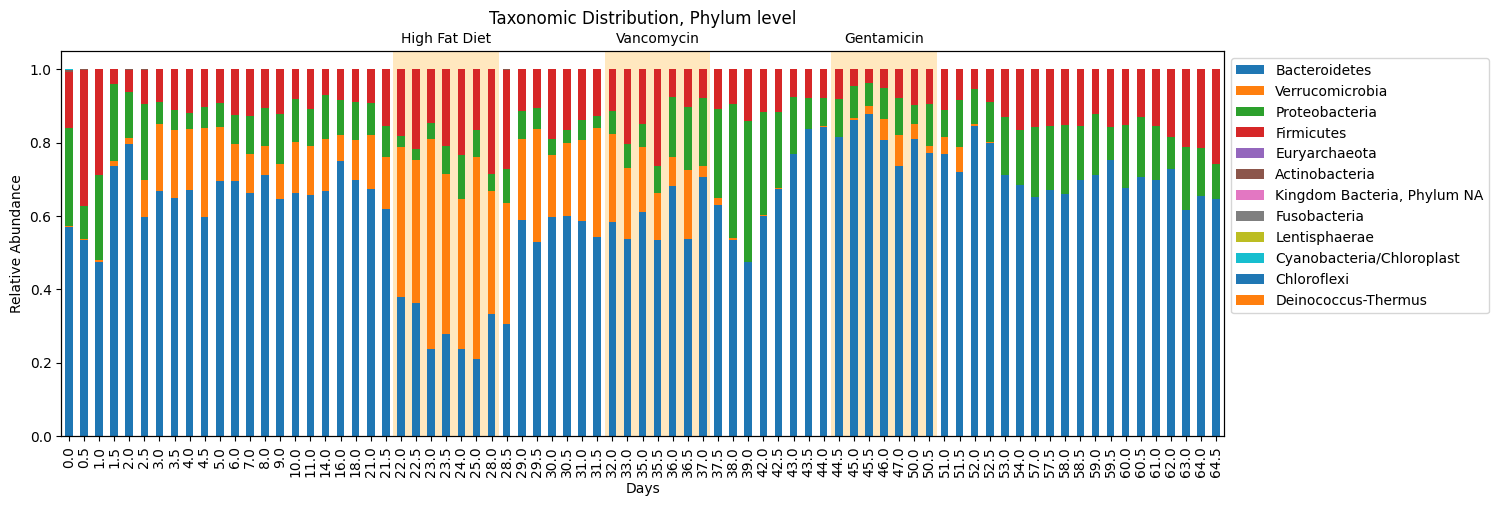

In [34]:
# Plot the taxa abundances at the phylum level for subject `2`
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
md2.visualization.taxonomic_distribution_over_time(gibson_h['2'], taxlevel='phylum', label_formatter='%(phylum)s', ax=ax)
plt.show()

AttributeError: 'Taxon' object has no attribute 'components'

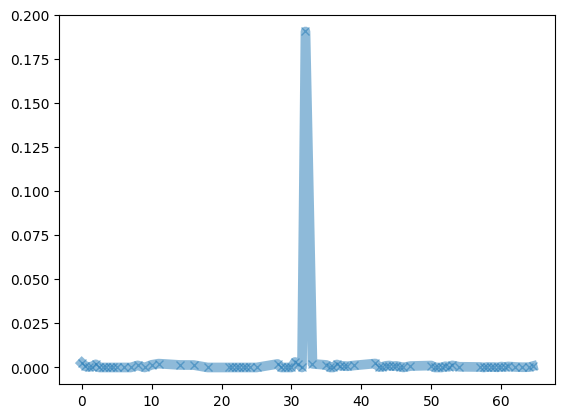

In [35]:
# Visualize the aggregate ASVs collapsed for any OTU in the study
ax = md2.visualization.aggregate_taxa_abundances(subj=gibson_h['2'], agg=gibson_h.taxa['ASV_3'])
plt.show()

In [36]:
params_h = md2.config.NegBinConfig(
    seed=0, burnin=100, n_samples=200,
    checkpoint=100, 
    basepath=str(output_dir / "negbin-healthy"))

In [37]:
mcmc_negbin_h = md2.negbin.build_graph(
    params=params_h, 
    graph_name=gibson_h.name, 
    subjset=gibson_h)

[DEBUG] Available subjects: 2,3,4,5
[DEBUG] Subject 2, available qpcr: 0.0,0.5,10.0,11.0,14.0,16.0,18.0,1.0,1.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,25.0,28.0,28.5,29.0,29.5,2.0,2.5,30.0,30.5,31.0,31.5,32.0,33.0,35.0,35.5,36.0,36.5,37.0,37.5,38.0,39.0,3.0,3.5,42.0,42.5,43.0,43.5,44.0,44.5,45.0,45.5,46.0,47.0,4.0,4.5,5.0,50.0,50.5,51.0,51.5,52.0,52.5,53.0,54.0,57.0,57.5,58.0,58.5,59.0,59.5,6.0,60.0,60.5,61.0,62.0,63.0,64.0,64.5,7.0,8.0,9.0
[DEBUG] Subject 3, available qpcr: 0.0,0.5,10.0,11.0,14.0,16.0,18.0,1.0,1.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,25.0,28.0,29.0,29.5,2.0,2.5,30.0,30.5,31.0,31.5,32.0,33.0,35.0,35.5,36.0,36.5,37.0,38.0,39.0,3.0,3.5,42.0,42.5,43.0,43.5,44.0,44.5,45.0,45.5,46.0,47.0,4.0,4.5,5.0,50.0,50.5,51.0,51.5,52.0,52.5,53.0,54.0,57.0,57.5,58.0,58.5,59.0,59.5,6.0,60.0,60.5,61.0,62.0,63.0,64.0,64.5,7.0,8.0,9.0
[DEBUG] Subject 4, available qpcr: 0.0,0.5,10.0,11.0,14.0,16.0,18.0,1.0,1.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,25.0,28.0,29.0,29.5,2.0,2.5,30.0,30.5,31.0,31.5,32.0,

In [38]:
mcmc_negbin_h = md2.negbin.run_graph(
    mcmc_negbin_h, 
    crash_if_error=True)

 50%|█████     | 100/200 [04:32<04:33,  2.73s/it][DEBUG] Inference iteration 100/200, time: 272.85170912742615
[DEBUG] Negative binomial dispersion a0: Value: 8.333005638636075e-11, Acceptance rate: 0.94
[DEBUG] Negative binomial dispersion a1: Value: 0.40991287118108205, Acceptance rate: 0.48
[DEBUG] Filtering: no-mp : Time: 2.7669, Acc: [0.819, 0.828, 0.815, 0.816], data/sec: 2129.43
100%|██████████| 200/200 [09:01<00:00,  2.71s/it]
[INFO] Inference total time: 2.7096711623668672/Gibb step
[INFO] remove local traces


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

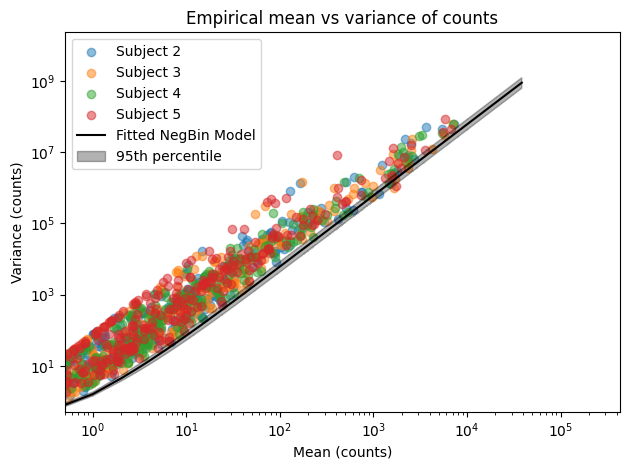

In [39]:
fig = md2.negbin.visualize_learned_negative_binomial_model(mcmc_negbin_h)
fig.tight_layout()
plt.show()

In [40]:
print('a0', md2.summary(mcmc_negbin_h.graph[STRNAMES.NEGBIN_A0]))
print('a1', md2.summary(mcmc_negbin_h.graph[STRNAMES.NEGBIN_A1]))

a0 {'median': 7.627859468295738e-11, 'mean': 7.303671561566165e-11, '25th percentile': 6.19161082611593e-11, '75th percentile': 8.712895227726833e-11}
a1 {'median': 0.6019798382092066, 'mean': 0.6146947086699798, '25th percentile': 0.4899786043810714, '75th percentile': 0.727539239670022}


In [41]:
# Get a0 and a1 from negbin (get the mean of the posterior) and fixes them for inference
a0_h = md2.summary(mcmc_negbin_h.graph[STRNAMES.NEGBIN_A0])['mean']
a1_h = md2.summary(mcmc_negbin_h.graph[STRNAMES.NEGBIN_A1])['mean']

print('negbin a0', a0_h)
print('negbin a1', a1_h)

negbin a0 7.303671561566165e-11
negbin a1 0.6146947086699798


In [42]:
basepath_h = output_dir / "mdsine2" / "healthy"
basepath_h.mkdir(exist_ok=True, parents=True)

In [43]:
# Initialize parameters of the model (Seed = 0) burnin=50, total steps=100
params_h = md2.config.MDSINE2ModelConfig(
    basepath=str(basepath_h), 
    seed=0,
    burnin=50, 
    n_samples=100, 
    negbin_a0=a0_h, negbin_a1=a1_h, 
    checkpoint=50
)

In [44]:
# The default number of modules is 30, which is larger than the number of taxa
# that we have in this dataset, which would throw a flag.
params_h.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'no-clusters'

In [ ]:
# initilize the graph
mcmc_h = md2.initialize_graph(params=params_h, graph_name=gibson_h.name, subjset=gibson_h)

[INFO] max_value found: 551243918704.4608, scaling_factor: 1.8140789695244354e-10
[INFO] Normalizing abundances for a max value of 100. Normalization constant: 1.8141E-10
[INFO] There are 305 qPCR measurements for 3 buckets. Each bucket is 101 measurements long
[INFO] Initializing Filtering
[INFO] Setting up the essential timepoints
[INFO] Essential timepoints: [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   6.   7.   8.
  9.  10.  11.  14.  16.  18.  21.  21.5 22.  22.5 23.  23.5 24.  25.
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  33.  35.  35.5 36.  36.5
 37.  37.5 38.  39.  42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  47.
 50.  50.5 51.  51.5 52.  52.5 53.  54.  57.  57.5 58.  58.5 59.  59.5
 60.  60.5 61.  62.  63.  64.  64.5]
[INFO] Initializing Zero inflation


[WARNING] `zero_inflation_transition_policy` is None so we are not doing anything


[INFO] Initializing LHS vector
[INFO] Initializing growth design matrix
[INFO] Initializing self-interactions design matrix
[INFO] Initializing Clustering concentration parameter
[INFO] Cluster Concentration initialization results:
	prior shape: 1e-05
	prior scale: 100000.0
	value: 1.0
[INFO] Initializing Clustering parameter
[INFO] Cluster Assingments initialization results:
Clustering object (contains ability to change the cluster assignments), n_clusters: 1473
Cluster 101573
	members: ['ASV_1']
	size: 1
Cluster 101574
	members: ['ASV_2']
	size: 1
Cluster 101575
	members: ['ASV_3']
	size: 1
Cluster 101576
	members: ['ASV_4']
	size: 1
Cluster 101577
	members: ['ASV_5']
	size: 1
Cluster 101578
	members: ['ASV_6']
	size: 1
Cluster 101579
	members: ['ASV_7']
	size: 1
Cluster 101580
	members: ['ASV_8']
	size: 1
Cluster 101581
	members: ['ASV_9']
	size: 1
Cluster 101582
	members: ['ASV_10']
	size: 1
Cluster 101583
	members: ['ASV_11']
	size: 1
Cluster 101584
	members: ['ASV_12']
	size: 1
C

In [ ]:
# Perform inference
mcmc_h = md2.run_graph(mcmc_h, crash_if_error=True)

  0%|          | 0/100 [00:00<?, ?it/s]

[ERROR] Crashed in `Cluster interaction indicator parameter`


  0%|          | 0/100 [00:11<?, ?it/s]

[CRITICAL] CHAIN `gibson` CRASHED
[ERROR] Unable to allocate 357. GiB for an array with shape (22095, 2168256) and data type float64
Traceback (most recent call last):
  File "/home/acs98/anaconda3/envs/mdsine2/lib/python3.7/site-packages/mdsine2/run.py", line 424, in run_graph
    mcmc.run(log_every=log_every, benchmarking=benchmarking)
  File "/home/acs98/anaconda3/envs/mdsine2/lib/python3.7/site-packages/mdsine2/pylab/inference.py", line 524, in run
    node.update()
  File "/home/acs98/anaconda3/envs/mdsine2/lib/python3.7/site-packages/mdsine2/posterior.py", line 4818, in update_relative
    self.make_rel_params()
  File "/home/acs98/anaconda3/envs/mdsine2/lib/python3.7/site-packages/mdsine2/posterior.py", line 4735, in make_rel_params
    XM_master = self.G.data.design_matrices[STRNAMES.CLUSTER_INTERACTION_VALUE].toarray()
  File "/home/acs98/anaconda3/envs/mdsine2/lib/python3.7/site-packages/mdsine2/design_matrices.py", line 838, in toarray
    return pl.toarray(self.matrix, dest

MemoryError: Unable to allocate 357. GiB for an array with shape (22095, 2168256) and data type float64

# McNulty et al., 2013

In [10]:
mcnulty = md2.dataset.parse(name='mcnulty', \
                            metadata='mcnulty-datasets/metadata.tsv', \
                            taxonomy='mcnulty-datasets/taxonomy.tsv', \
                            reads='mcnulty-datasets/counts.tsv', \
                            qpcr='mcnulty-datasets/DNA_yields.tsv', \
                            perturbations='mcnulty-datasets/perturbations.tsv')

[INFO] TaxaSet parsng new taxonomy table. Resetting
[DEBUG] Reseting perturbations


In [59]:
params = md2.config.NegBinConfig(
    seed=0, burnin=100, n_samples=200,
    checkpoint=100, 
    basepath="negbin")

In [60]:
mcmc_negbin = md2.negbin.build_graph(
    params=params, 
    graph_name=mcnulty.name, 
    subjset=mcnulty)

[DEBUG] Available subjects: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
[DEBUG] Subject 1, available qpcr: 1.0,2.0,3.0,5.0,7.0,10.0,12.0,13.0,15.0,16.0,17.0,19.0,21.0,25.0,26.0,27.0,29.0,30.0,31.0,33.0,35.0,38.0,40.0,41.0,42.0


KeyError: 0